<img src="https://avatars.githubusercontent.com/u/16632335?v=4" alt="Avatar" style="border-radius: 50%; width: 150px; height: 150px;">

# Regressão Linear Múltipla: Uma variável explicativa

## Requisitos das Variáveis para Regressão Linear

### Variável Dependente (Y)
- **Tipo:** Deve ser quantitativa e contínua, representando valores mensuráveis em uma escala contínua (ex: altura, peso, preço).
- **Relação com X:** A relação entre Y e as variáveis independentes (X) deve ser aproximadamente linear, ou seja, representável por uma linha reta.

### Variáveis Independentes (X)
- **Independência Linear:** As variáveis X não devem ser linearmente dependentes entre si. Uma variável não pode ser prevista como combinação linear das outras. ***Multicolinearidade*** pode prejudicar a interpretação do modelo.
- **Tipos:** Podem ser quantitativas (contínuas ou discretas) ou categóricas. Variáveis categóricas precisam ser codificadas (ex: one-hot encoding).

### Outras Considerações
- **Normalidade dos Resíduos:** Idealmente, os resíduos (diferença entre valores observados e previstos) devem seguir uma distribuição normal. Testes estatísticos e gráficos podem verificar isso.
- **Homocedasticidade:** A variância dos resíduos deve ser constante para todos os valores de X.
- **Ausência de Outliers:** Valores extremos podem distorcer o modelo. É importante identificá-los e tratá-los antes da análise.

*Observação:* Estes são requisitos ideais. A regressão linear pode ser aplicada mesmo que alguns não sejam totalmente atendidos, mas é importante estar ciente das limitações e possíveis problemas na interpretação dos resultados.


## Exemplo de Dúvida do Negócio
Uma empresa está interessada em verificar se a remuneração dos seus colaboradores está de acordo com as políticas vigentes. Para isso coletou uma amostra de 46 colaboradores.

__Pergunta de Negócio__:
O salário muda de acordo com os anos de educação superior? Se sim, é possível construir um modelo que  estime o salário de acordo com esses anos?

## Importação das bibliotecas

In [2]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import statsmodels.api as sm

## Importação da base de dados

In [3]:
# Importe a biblioteca pandas para manipulação de dados
import pandas as pd

# Leia o arquivo CSV 'base_funcionarios_v1.csv' e armazene-o em um DataFrame chamado df
# Use ';' como delimitador e defina a coluna 'id' como o índice do DataFrame
df = pd.read_csv('base_funcionarios_v4.csv', sep=',')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['Tempo_de_Carreira'])

# Verifique a forma do DataFrame, ou seja, o número de linhas e colunas
df.shape

(46, 4)

In [4]:
# Exibe as primeiras linhas do DataFrame para visualização dos dados
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Possui_Skill_Dados
0,5517.4,3,3,Não
1,6399.9,4,6,Não
2,6206.7,6,3,Não
3,6060.6,4,5,Não
4,6122.7,2,9,Não


In [5]:
# Verifica os tipos de dados de cada coluna no DataFrame
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
Tempo_Empresa           int64
Possui_Skill_Dados     object
dtype: object

In [6]:
# Mostra a soma de todos os valores ausentes em cada coluna do DataFrame
df.isna().sum()

Salario               0
Anos_Educ_Superior    0
Tempo_Empresa         0
Possui_Skill_Dados    0
dtype: int64

In [7]:
# Definir a variável target
Target = df['Salario']

## Transformar variável qualitativa em uma variável dummies: 

In [8]:
# Transformar variável qualitativa em uma variável dummies: 
# Usando get_dummies() para criar variáveis dummy e remover a primeira categoria para evitar multicolinearidade
df = pd.get_dummies(df, drop_first=True)
df.sample(5, random_state=777)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Possui_Skill_Dados_Sim
33,5228.3,3,2,0
9,8086.9,6,14,1
12,9316.0,6,25,1
19,5072.4,4,0,0
30,7219.6,6,9,1


## Análise Exploratória dos Dados

In [9]:
# Seleciona todas as colunas do DataFrame 'df' que contêm dados numéricos (quantitativos)
quantitative_df = df.select_dtypes(include=['number'])

# Seleciona todas as colunas do DataFrame 'df' que não contêm dados numéricos (qualitativos)
qualitative_df = df.select_dtypes(exclude=['number'])

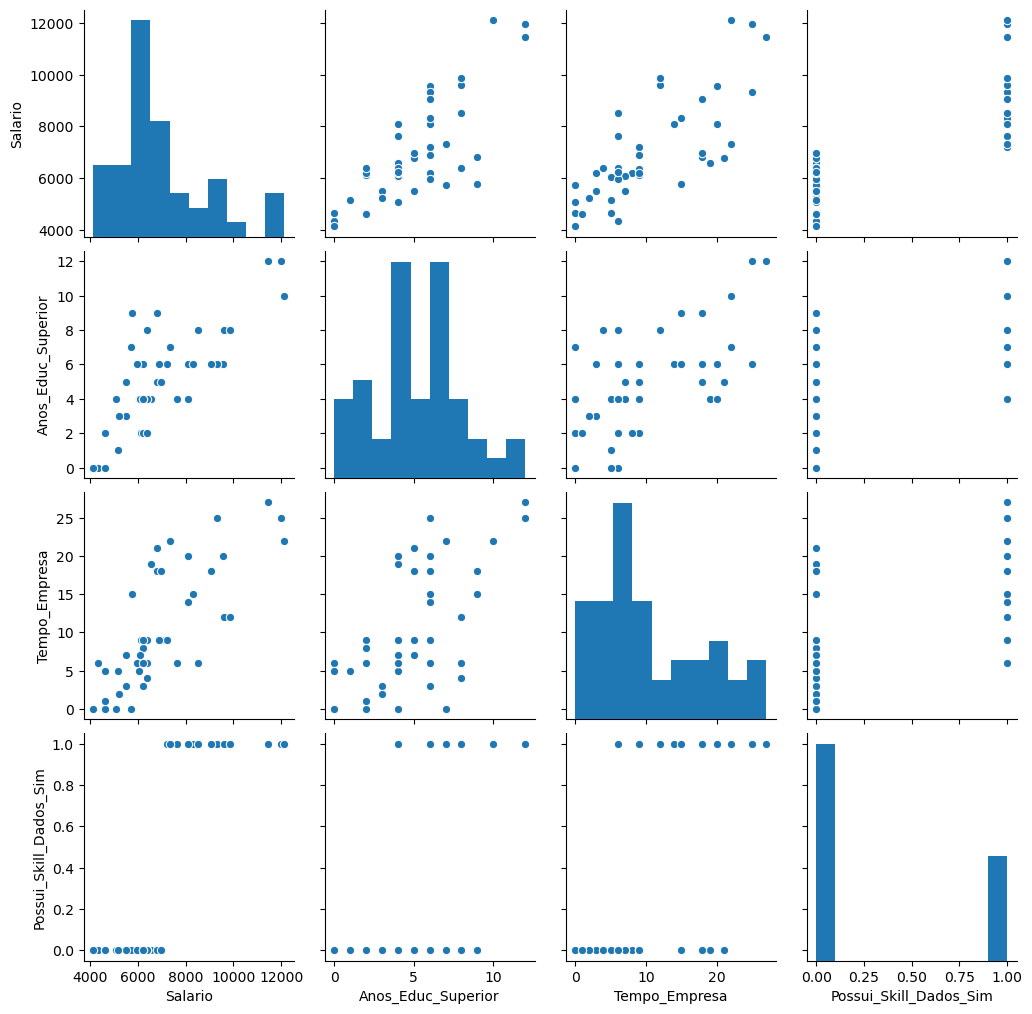

In [10]:
# Cria um gráfico de pares (pairplot) para explorar as relações entre as variáveis numéricas
# O parâmetro 'hue' permite colorir os pontos de acordo com a variável 'Target'
sns.pairplot(df, hue=None)

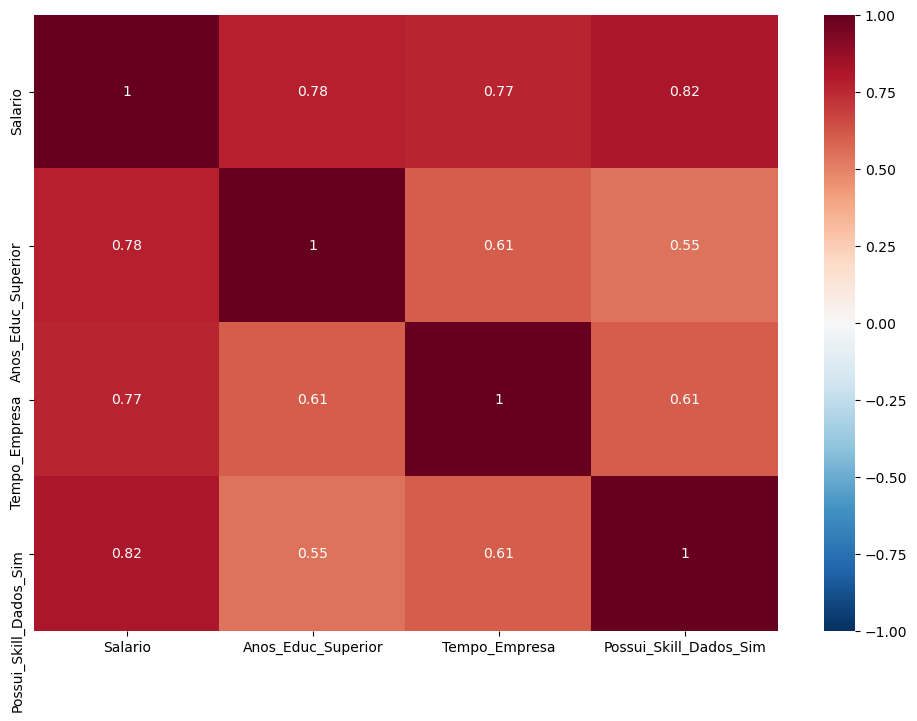

In [11]:
# Correlação Linear de Pearson
# Cria uma figura com o tamanho especificado
fig = plt.figure(figsize=(12,8))

# Cria um mapa de calor da matriz de correlação do DataFrame 'df'
# cmap='RdBu_r' define a paleta de cores como vermelho-azul reverso
# vmin=-1 e vmax=1 definem os valores mínimos e máximos da escala de cores
# annot=True exibe os valores de correlação dentro de cada célula do mapa de calor
sns.heatmap(df.corr(), cmap='RdBu_r', vmin=-1, vmax=1, annot=True);

## Ajuste do Modelo de Regressão usando a biblioteca Statsmodels

In [12]:
# Seleciona todas as colunas do DataFrame 'df' que contêm dados numéricos (exceto Target)
df_numerico = df.drop(columns=[Target.name]).select_dtypes(include=['number'])

In [13]:
# Adiciona uma coluna de intercepto ao DataFrame 'df_numerico'
df_numerico.insert(0, 'intercepto', 1)

# Variável resposta (variável dependente)
# Definindo a variável resposta como 'Salario'
y = Target

# Variável explicativa (variável independente)
# Selecionando todas as colunas numéricas, incluindo o intercepto
x = df_numerico

In [14]:
# Ajuste do Modelo de Regressão Linear
# Cria um modelo de regressão linear ordinária (OLS) com a variável Target 'y' e as variáveis explicativas 'x'
modelo = sm.OLS(y, x)

# Ajusta o modelo aos dados
resultado = modelo.fit()

In [15]:
# Resultado do Ajuste do Modelo de Regressão Linear
# Imprime um resumo estatístico do resultado do ajuste do modelo
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     87.90
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           3.87e-18
Time:                        09:35:03   Log-Likelihood:                -366.99
No. Observations:                  46   AIC:                             742.0
Df Residuals:                      42   BIC:                             749.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercepto              4412

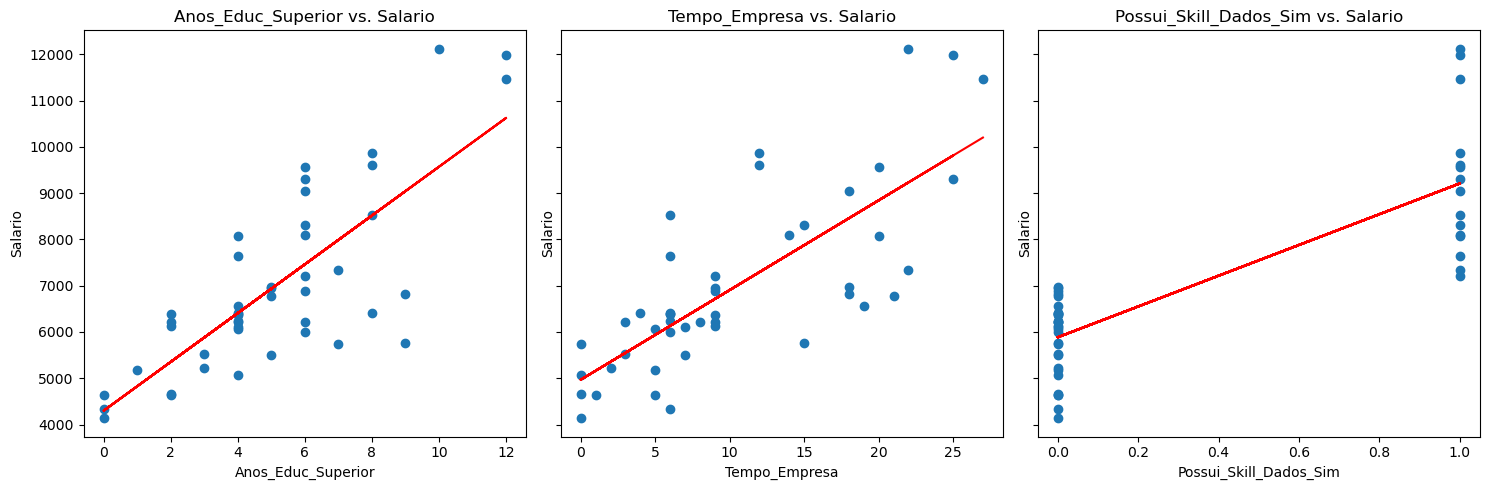

In [16]:
# Cria uma lista de todas as variáveis independentes numéricas
variaveis_independentes = quantitative_df.columns.drop(Target.name)

# Cria um número de subplots de acordo com o número de variáveis independentes
num_subplots = len(variaveis_independentes)
fig, axs = plt.subplots(1, num_subplots, sharey=True, figsize=(15, 5))

# Itera sobre as variáveis independentes e cria um gráfico de dispersão com reta de regressão linear
for i, coluna in enumerate(variaveis_independentes):
    # Scatter plot
    axs[i].scatter(df[coluna], df[Target.name])
    # Ajuste da reta de regressão linear
    m, b = np.polyfit(df[coluna], df[Target.name], 1)
    axs[i].plot(df[coluna], m*df[coluna] + b, color='red')
    # Configurações do subplot
    axs[i].set_title(f'{coluna} vs. {Target.name}')
    axs[i].set_xlabel(coluna)
    axs[i].set_ylabel(Target.name)

# Exibe os gráficos
plt.tight_layout()
plt.show()

## CONCLUSÃO: Interpretação do R² Ajustado

In [17]:
# Coeficientes do modelo
# Extrai os coeficientes estimados do modelo de regressão linear
coeficientes = resultado.params

# R-quadrado ajustado do modelo
# Calcula o R-quadrado ajustado multiplicado por 100 para expressar em porcentagem
adj_r_squared = resultado.rsquared_adj * 100

In [18]:
coeficientes

intercepto                4412.539064
Anos_Educ_Superior         247.885705
Tempo_Empresa               67.262890
Possui_Skill_Dados_Sim    1861.777400
dtype: float64

In [19]:
# Criando a mensagem explicativa
mensagem = f"O modelo de Regressão Linear explica aproximadamente {adj_r_squared:.2f}% da variabilidade na variável alvo."

# Imprimir o resultado
print(mensagem)

O modelo de Regressão Linear explica aproximadamente 85.28% da variabilidade na variável alvo.


In [20]:
# Interpretar o nome do coeficiente baseado no índice
def interpretar_nome_coeficiente(indice):
    if indice == 0:
        return 'Intercepto'
    else:
        return f'β{indice}'

# Interpretar o valor do coeficiente
def interpretar_valor_coeficiente(indice, nome_variavel, valor_coeficiente):
    if indice == 0:
        return f"Salário base: R${valor_coeficiente:.2f}"
    else:
        return f"{interpretar_nome_coeficiente(indice)}: Cada unidade adicional de {nome_variavel} gera um aumento médio de R${valor_coeficiente:.2f}"

# Lista para armazenar a interpretação de cada coeficiente
interpretacoes_coeficientes = []

# Loop sobre cada coeficiente
for indice, (nome_variavel, valor_coeficiente) in enumerate(coeficientes.items()):
    interpretacao = interpretar_valor_coeficiente(indice, nome_variavel, valor_coeficiente)
    interpretacoes_coeficientes.append(interpretacao)

# Imprimir o resultado
print('\n'.join(interpretacoes_coeficientes))

Salário base: R$4412.54
β1: Cada unidade adicional de Anos_Educ_Superior gera um aumento médio de R$247.89
β2: Cada unidade adicional de Tempo_Empresa gera um aumento médio de R$67.26
β3: Cada unidade adicional de Possui_Skill_Dados_Sim gera um aumento médio de R$1861.78


## VALIDAÇÃO: Diagnóstico do Modelo: Análise dos Resíduos

In [22]:
# Esta função cria um gráfico de dispersão dos resíduos de um modelo estatístico e adiciona linhas horizontais em 0, -2 e +2 para ajudar a avaliar a aleatoriedade dos resíduos.
def grafico_residuos(resultado):
    # Cria um gráfico de dispersão dos resíduos
    resid_graf = sns.scatterplot(x=list(range(0,len(resultado.resid_pearson))),
                                 y=resultado.resid_pearson.tolist())
    
    # Localizando valor mínimo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(-3)
    ymin = min(r_aux) * 1.1
    
    # Localizando valor máximo dos resíduos
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1
    
    # Define os limites do eixo y no gráfico
    resid_graf.set(ylim=(ymin, ymax))
    
    # Obtém os eixos do gráfico
    ax1 = resid_graf.axes
    
    # Adiciona linhas horizontais nos valores 0, -2 e +2 no eixo y
    ax1.axhline( 0, color='black', ls='--')
    ax1.axhline(-2, color='black', ls='--')
    ax1.axhline(+2, color='black', ls='--')
    
    # Mostra o gráfico
    plt.show()

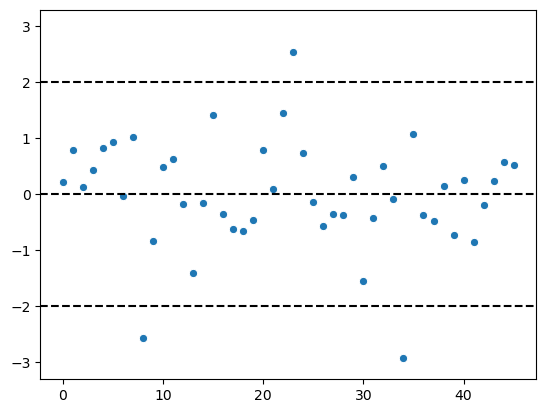

In [24]:
# Chamar função grafico_residuos com objeto de interpretar os reíduos do modelo
grafico_residuos(resultado)

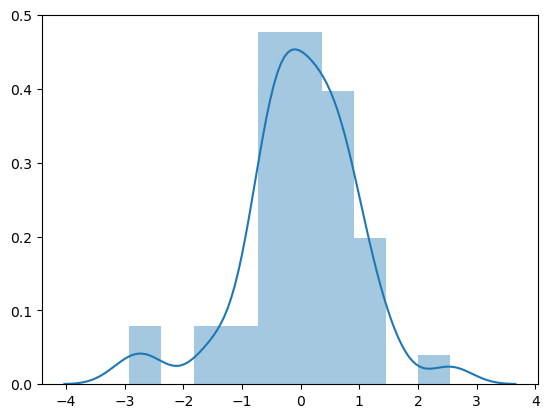

In [25]:
# Construção de histograma para avaliar a distribuição dos resíduos
sns.distplot(resultado.resid_pearson);

## Como gráfico é subjetivo, vamos aos números
### Teste de Shapiro-Wilk:

No contexto do teste de Shapiro-Wilk:

- A hipótese nula (H0) é que os dados seguem uma distribuição normal.
- A hipótese alternativa (H1) é que os dados não seguem uma distribuição normal.
- Se p-valor < 5% então rejeita H0, logo NÃO é uma distribuição normal
- se p-valor >= 5% então NÃO rejeita H0, logo não há evididência para rejeitar, logo a distribuição é normal

In [30]:
# Realização de Teste de Hipóteses para avaliar Normalidade
from scipy.stats import shapiro

# Realiza o teste de normalidade Shapiro-Wilk nos resíduos
normalidade = shapiro(resultado.resid_pearson)

# Imprime os resultados do teste
print("Teste de Normalidade Shapiro-Wilk nos resíduos:")
print(" ")
print("Estatística de teste: %.3f" % normalidade.statistic)
print("Valor p: %.3f" % normalidade.pvalue)
print(" ")
if normalidade.pvalue < 0.05:
    print("Resultado: Os resíduos NÃO parecem seguir uma distribuição normal.")
else:
    print("Resultado: Não há evidências suficientes para rejeitar a hipótese de normalidade dos resíduos.")

Teste de Normalidade Shapiro-Wilk nos resíduos:
 
Estatística de teste: 0.951
Valor p: 0.054
 
Resultado: Não há evidências suficientes para rejeitar a hipótese de normalidade dos resíduos.


### Teste de Homocedasticidade dos Resíduos

In [32]:
from statsmodels.stats.diagnostic import het_white

# Lista de rótulos para os resultados do teste de heterocedasticidade White
labels = ['LM Statistic',       # Estatística LM do teste de heterocedasticidade White
          'LM-Test p-value',   # Valor p associado ao teste LM do teste de heterocedasticidade White
          'F-Statistic',       # Estatística F do teste de heterocedasticidade White
          'F-Test p-value']    # Valor p associado ao teste F do teste de heterocedasticidade White

In [34]:
# Executa o teste de heterocedasticidade de White nos resíduos do modelo (resultado.resid_pearson)
# em relação às variáveis independentes do modelo (resultado.model.exog).
white_test = het_white(resultado.resid_pearson, resultado.model.exog)

In [36]:
# Imprime um resumo dos resultados do teste de heterocedasticidade de White
print("Resultados do teste de Heterocedasticidade de White:")
print("----------------------------------------------------")
print(f"LM Statistic       : {white_test[0]:.4f}")
print(f"LM-Test p-value    : {white_test[1]:.4f}")
print(f"F-Statistic        : {white_test[2]:.4f}")
print(f"F-Test p-value     : {white_test[3]:.4f}")
print("----------------------------------------------------")

# Interpretando os resultados
if white_test[1] < 0.05:
    print("O valor p do teste LM é menor que 0.05, sugerindo que há evidências de heterocedasticidade.")
    print("Isso indica que a variância dos erros não é constante em relação às variáveis independentes.")
else:
    print("O valor p do teste LM é maior ou igual a 0.05, indicando falta de evidências de heterocedasticidade.")
    print("Isso sugere que a variância dos erros pode ser considerada constante em relação às variáveis independentes.")

Resultados do teste de Heterocedasticidade de White:
----------------------------------------------------
LM Statistic       : 11.7153
LM-Test p-value    : 0.1644
F-Statistic        : 1.5804
F-Test p-value     : 0.1643
----------------------------------------------------
O valor p do teste LM é maior ou igual a 0.05, indicando falta de evidências de heterocedasticidade.
Isso sugere que a variância dos erros pode ser considerada constante em relação às variáveis independentes.
